In [34]:
import numpy as np
import pandas as pd

In [35]:
column_names = ['user_id','item_id','ratings','timestamp']
df = pd.read_csv("D:/study/python/codes/ml-latest-small/ratings.csv")

In [36]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [37]:
movie_title = pd.read_csv("D:/study/python/codes/ml-latest-small/movies.csv")

In [38]:
movie_title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [39]:
df = pd.merge(df,movie_title,on='movieId')

In [40]:
df.tail(20)

,userId,movieId,rating,timestamp,title,genres
100816,610,139511,3.0,1479545400,Exte: Hair Extensions (2007),Horror
100817,610,139655,3.0,1493848639,Goodnight Mommy (Ich seh ich seh) (2014),Drama|Fantasy|Horror|Thriller
100818,610,140267,4.0,1493848268,The Witch (2015),Horror
100819,610,141400,4.0,1479544170,Invincible Shaolin (1978),Action
100820,610,141799,3.5,1493848820,Cooties (2015),Comedy|Horror
100821,610,142366,3.0,1479543146,Cigarette Burns (2005),Horror|Thriller
100822,610,142598,4.0,1493848878,Last Shift (2014),Horror
100823,610,145951,0.5,1493849019,Bloodsport: The Dark Kumite (1999),Action|Thriller
100824,610,146309,4.0,1493850187,The Boy and the Beast (2015),Action|Adventure|Animation
100825,610,147657,4.0,1479544210,Masked Avengers (1981),Action


##### Exploratory Data Analysis

Let's Explore the dataset to look at some top performing Movies and other Trends

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### Lets Create a ratings dataframe with average ratings and number of ratings

In [42]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head(20)

title
Karlson Returns (1970)                               5.0
Winter in Prostokvashino (1984)                      5.0
My Love (2006)                                       5.0
Sorority House Massacre II (1990)                    5.0
Winnie the Pooh and the Day of Concern (1972)        5.0
Sorority House Massacre (1986)                       5.0
Bill Hicks: Revelations (1993)                       5.0
My Man Godfrey (1957)                                5.0
Hellbenders (2012)                                   5.0
In the blue sea, in the white foam. (1984)           5.0
Won't You Be My Neighbor? (2018)                     5.0
Red Sorghum (Hong gao liang) (1987)                  5.0
Love Exposure (Ai No Mukidashi) (2008)               5.0
My Sassy Girl (Yeopgijeogin geunyeo) (2001)          5.0
The Love Bug (1997)                                  5.0
Ballad of Narayama, The (Narayama bushiko) (1983)    5.0
Heidi Fleiss: Hollywood Madam (1995)                 5.0
Louis Theroux: Law & Diso

In [43]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head(20)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

In [44]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [45]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,number of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


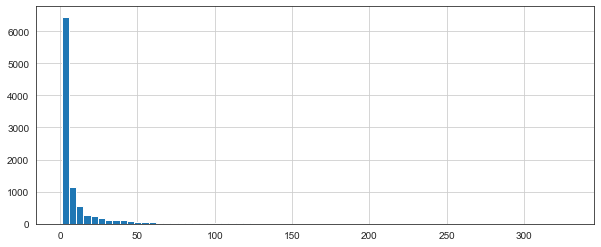

In [46]:
plt.figure(figsize=(10,4))
ratings['number of ratings'].hist(bins=70)

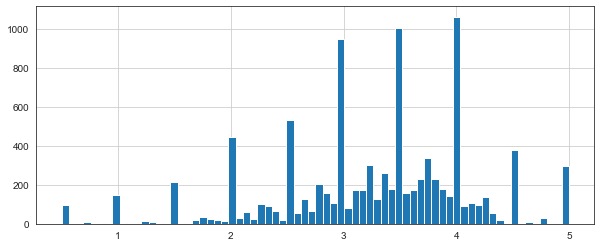

In [47]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

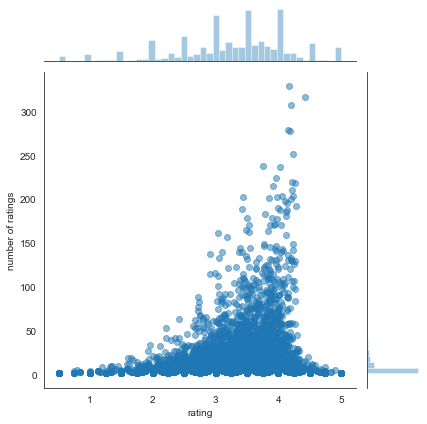

In [48]:
sns.jointplot(x='rating',y='number of ratings',data=ratings,alpha=0.5)

##### Recommending Similar movies

Lets Create a Matrix where we have user id on one axis and title of the movies on another axis, There will be a lot of Nan Values where the user has not given any rating value

In [54]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head(20)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [56]:
ratings.sort_values('number of ratings',ascending = False).head(10)

,rating,number of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [57]:
ratings.head()

,rating,number of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [59]:
Forrest_user_ratings = moviemat['Forrest Gump (1994)']
Jurassic_park_ratings = moviemat['Jurassic Park (1993)']
Forrest_user_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

With respect to above dataset we will correlate with other movies in the moviemat dataframe

In [60]:
similar_with_Forrest = moviemat.corrwith(Forrest_user_ratings)
similar_with_Jurassic = moviemat.corrwith(Jurassic_park_ratings)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


##### Lets Clean this for all Nan values and we will convert it to a dataframe instead of a series 

In [62]:
corr_Forrest = pd.DataFrame(similar_with_Forrest,columns=['Correlation'])
corr_Forrest.dropna(inplace=True)
corr_Forrest.head(20)

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000
10 Cloverfield Lane (2016),0.752057
10 Items or Less (2006),-1.000000
10 Things I Hate About You (1999),0.088009
"10,000 BC (2008)",-0.143823


#### Higher the Correlation, more correlated that Particular movie is and higher chances that the user will like it

In [65]:
corr_Forrest.sort_values('Correlation',ascending = False).head()

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0


##### iF ratings are present for >100 times, then only i will consider the correlation

In [66]:
corr_Forrest = corr_Forrest.join(ratings['number of ratings'])
corr_Forrest.head()

,Correlation,number of ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


Now Sort The values and see how title makes a lot more sense

In [68]:
corr_Forrest[corr_Forrest['number of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,number of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125
Braveheart (1995),0.416976,237
Ferris Bueller's Day Off (1986),0.405830,109
Mrs. Doubtfire (1993),0.401408,144
Full Metal Jacket (1987),0.397241,102


In [72]:
corr_Jurassic = pd.DataFrame(similar_with_Jurassic,columns=['Correlation'])
corr_Jurassic.dropna(inplace=True)
corr_Jurassic = corr_Jurassic.join(ratings['number of ratings'])
corr_Jurassic[corr_Jurassic['number of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number of ratings
title,,
Jurassic Park (1993),1.000000,238
Outbreak (1995),0.533780,101
Ghostbusters (a.k.a. Ghost Busters) (1984),0.522286,120
"Fugitive, The (1993)",0.460603,190
Indiana Jones and the Temple of Doom (1984),0.456533,108


##### Rcommendation Completed for Two Movies , same can be automated for all the Movies 